In [1]:
import sys
sys.path

['',
 '/anaconda2/lib/python27.zip',
 '/anaconda2/lib/python2.7',
 '/anaconda2/lib/python2.7/plat-darwin',
 '/anaconda2/lib/python2.7/plat-mac',
 '/anaconda2/lib/python2.7/plat-mac/lib-scriptpackages',
 '/anaconda2/lib/python2.7/lib-tk',
 '/anaconda2/lib/python2.7/lib-old',
 '/anaconda2/lib/python2.7/lib-dynload',
 '/anaconda2/lib/python2.7/site-packages',
 '/anaconda2/lib/python2.7/site-packages/aeosa',
 '/anaconda2/lib/python2.7/site-packages/IPython/extensions',
 '/Users/christanasescu/.ipython']

In [2]:
import networkx


In [3]:
import gensim


In [4]:
import nltk


In [5]:
from nltk.corpus import brown


In [6]:
sentences = brown.sents()


In [7]:
model = gensim.models.Word2Vec(sentences, min_count=1)


In [8]:
#min_count (int) – Ignores all words with total frequency lower than this.

A word embedding is an approach to provide a dense vector representation of words that capture 
something about their meaning. 
Word embeddings work by using an algorithm to train a set of fixed-length dense and continuous-valued vectors 
based on a large corpus of text. 
Each word is represented by a point in the embedding space and these points are learned and moved around based on 
the words that surround the target word.
This approach involves defining a word by the company that it keeps that allows the word embedding to learn 
something about the meaning of words. 

The vector space representation of the words provides a projection where words with similar meanings are locally clustered within the space.

The use of word embeddings over other text representations is one of the key methods that has led to 
breakthrough performance with deep neural networks on problems like machine translation.


Word2vec is one algorithm for learning a word embedding from a text corpus.

"This tool provides an efficient implementation of the continuous bag-of-words and skip-gram architectures for computing vector representations of words. These representations can be subsequently used in many natural language processing applications and for further research." (from the Google Code website)

It comes in two 'flavors', CBOW and Skip-gram. CBOW--Continuous Bag of Words
In CBOW you are predicting a target word from source context words. 
In Skip-gram it is the inverse, given a target word, it predicts source context words.

The approach was developed by Tomas Mikolov.


Gensim provides the Word2Vec class for working with a Word2Vec model.



Gensim is a robust open-source vector space modeling and topic modeling toolkit implemented in Python. 
It uses NumPy, SciPy, and optionally Cython for performance.
Developed by Radim Řehůřek


Gensim is specifically designed to handle large text collections, using data streaming and efficient incremental algorithms, which differentiates it from most other scientific software packages that only target batch and in-memory processing. (Wikipedia)

In [9]:
model.save("brown_model")
print ('Brown corpus model saved')

Brown corpus model saved


In [10]:
model = gensim.models.Word2Vec.load("brown_model")
print (model.most_similar("mother"))

[(u'father', 0.9846152067184448), (u'husband', 0.9686628580093384), (u'wife', 0.952644944190979), (u'son', 0.9326068162918091), (u'friend', 0.9309351444244385), (u'nickname', 0.9172484874725342), (u'voice', 0.9113807678222656), (u'addiction', 0.9070208072662354), (u'errand', 0.9069424867630005), (u'eagle', 0.9016514420509338)]


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [11]:
#find the odd one out
print (model.doesnt_match('breakfast cereal dinner lunch'.split()))
print model.doesnt_match('cat dog table'.split())
#vector representation of word human
print model["human"]

cereal
table
[ 1.3200774   0.37413606 -1.2794206   0.016631   -0.85894144 -0.08865643
 -0.05582843 -0.14610456  0.48530763  0.32548237 -0.00921001 -0.46156996
 -0.3942036   0.05578956  0.18740952  0.40649903 -0.5725118  -0.49437505
 -0.02739683 -0.39226276 -1.094535    0.1833963   0.92273754  0.18788761
 -0.2238642   0.41259775 -0.5394411   0.03929015 -0.5504904  -0.607356
 -0.38253614  0.76811856  0.4029248   0.04256964 -0.05355756  0.45401505
 -0.10037751  0.7495253   0.4618229  -1.4566085   0.35367763  0.89489037
 -0.6761965  -0.04606239  0.6167554  -1.1803753  -0.03095445  0.10690176
 -0.5083509   0.08226071 -0.2875363   0.49234492 -0.01311419 -0.1318594
 -0.14651525  0.64284754 -0.17574175 -0.03253049 -0.7567072  -0.64210683
 -0.02210955 -0.58343786 -0.24147096 -0.20607673 -0.22094126 -0.0481516
 -0.5101732   0.097742    1.1622665   0.26401016 -0.9163387  -0.29742128
 -1.1259524   0.6467607  -0.5314112  -0.1166985  -0.30910408  0.02888255
  0.96410304 -0.15040523 -0.536511    0.08

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [12]:
model.similarity('human', 'machine')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.7479020395885557

In [13]:
model.similarity('machine', 'animal')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9367680442554094

In [14]:
model.similarity('machine', 'inanimate')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.6838410028431674

In [15]:
model.similarity('human', 'computer')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.7144461733656333

In [16]:
model.similarity('machine', 'computer')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9209919446501269

In [17]:
model.most_similar(positive=['machine'], topn = 3)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[(u'brace', 0.9837124347686768),
 (u'praise', 0.979796290397644),
 (u'violin', 0.9797403216362)]

In [18]:
model.most_similar(positive=['machine'], topn = 10)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[(u'brace', 0.9837124347686768),
 (u'praise', 0.979796290397644),
 (u'violin', 0.9797403216362),
 (u'herd', 0.9784946441650391),
 (u'cup', 0.9784566164016724),
 (u'crimson', 0.9783793687820435),
 (u'suit', 0.9768637418746948),
 (u'Cut', 0.9766368269920349),
 (u'Nobel', 0.9762342572212219),
 (u'nut', 0.9759470820426941)]

In [19]:
model.most_similar(negative = ['machine'], topn = 10)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[(u'egrets', 0.8097509145736694),
 (u'pinch-hitter', 0.7692123651504517),
 (u'25,000,000', 0.7555527687072754),
 (u'lads', 0.6898640990257263),
 (u'overindulged', 0.6714740991592407),
 (u'conveying', 0.664154589176178),
 (u'necessaries', 0.6461254358291626),
 (u'eva', 0.6427441835403442),
 (u'draughty', 0.6182143688201904),
 (u'Thynnes', 0.6104534268379211)]

Let us try another model.

NLTK includes a pre-trained model which is part of a model that is trained on 100 billion words from the Google News Dataset.

In [20]:
from nltk.data import find

word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))


What does the name say? It was pruned. The initial set was about 3 GB. 
Let us initiate the model and then see to what size it has been pruned:

In [21]:
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [22]:
len(model.vocab)

43981

In [23]:
len(model['machine'])

300

In [24]:
model.most_similar(positive=['machine'], topn = 10)

[(u'machines', 0.7677488327026367),
 (u'machinery', 0.5260840058326721),
 (u'Machine', 0.5063986778259277),
 (u'Machines', 0.45715785026550293),
 (u'apparatus', 0.4539251923561096),
 (u'lathes', 0.45199644565582275),
 (u'automaton', 0.44719603657722473),
 (u'dispenser', 0.4465298652648926),
 (u'hobbing', 0.43680340051651),
 (u'computer', 0.42776867747306824)]

In [25]:
model.most_similar(negative=['machine'], topn = 10)

[(u'interfaith', 0.17150536179542542),
 (u"Poor's", 0.16424152255058289),
 (u'Unmarried', 0.15351945161819458),
 (u'Vienne', 0.14776203036308289),
 (u'Nations', 0.14426946640014648),
 (u'matrimonial', 0.14347968995571136),
 (u'Blasphemous', 0.14094440639019012),
 (u'Equity', 0.14091116189956665),
 (u'Fulbright', 0.14002956449985504),
 (u'commencements', 0.1369818150997162)]


Mikolov et al. (2013) figured out that word embedding captures much of syntactic and semantic regularities. 
For example, the vector 'King - Man + Woman' is close to 'Queen' and 'Germany - Berlin + Paris' is close to 'France'.

In [26]:
from gensim.models import KeyedVectors

In [27]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man']) 

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[(u'queen', 0.7118192911148071),
 (u'monarch', 0.6189673542976379),
 (u'princess', 0.5902431011199951),
 (u'prince', 0.5377321243286133),
 (u'kings', 0.5236842632293701),
 (u'queens', 0.5181134939193726),
 (u'throne', 0.5005807876586914),
 (u'royal', 0.4938204884529114),
 (u'ruler', 0.4909273684024811),
 (u'princes', 0.48108145594596863)]

In [28]:
model.wv.most_similar_cosmul(positive=['woman', 'king'], negative=['man'])

#most_similar_cosmul() is based on Levy and
#Goldberg's method. The formula is
#*argmax(cos(b*,b)*cos(b*,a*)/(**cos(b*,a)+epsilon**))*

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[(u'queen', 0.9314123392105103),
 (u'monarch', 0.858533501625061),
 (u'princess', 0.8476566672325134),
 (u'queens', 0.809981644153595),
 (u'prince', 0.8009797930717468),
 (u'throne', 0.7853889465332031),
 (u'royal', 0.7835603356361389),
 (u'ruler', 0.7720382213592529),
 (u'goddess', 0.7712306380271912),
 (u'Princess', 0.7667570114135742)]

In [29]:
model.wv.most_similar_cosmul(positive=['Paris','Germany'], negative=['Berlin'])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[(u'France', 0.9849966764450073),
 (u'Belgium', 0.8674561381340027),
 (u'Spain', 0.8407710790634155),
 (u'Italy', 0.8346039056777954),
 (u'Switzerland', 0.8240053653717041),
 (u'French', 0.8182945847511292),
 (u'Morocco', 0.81309974193573),
 (u'Europe', 0.8017892241477966),
 (u'Netherlands', 0.7938497066497803),
 (u'Bordeaux', 0.7927432060241699)]

In [30]:
model.wv.most_similar_cosmul(positive=['writer', 'novelist'], negative=['playwright'])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[(u'columnist', 0.9119311571121216),
 (u'journalist', 0.9025043845176697),
 (u'author', 0.8960609436035156),
 (u'reporter', 0.8851152658462524),
 (u'editor', 0.8748608827590942),
 (u'scribe', 0.871620237827301),
 (u'sportswriter', 0.8525788187980652),
 (u'writers', 0.8515796661376953),
 (u'writes', 0.8491745591163635),
 (u'newspaperman', 0.8411786556243896)]

In [31]:
model.wv.most_similar_cosmul(positive=['writer', 'novelist'])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[(u'poet', 0.6610976457595825),
 (u'playwright', 0.6517696380615234),
 (u'author', 0.64620441198349),
 (u'novelists', 0.6419010162353516),
 (u'journalist', 0.641152560710907),
 (u'dramatist', 0.6224865913391113),
 (u'novels', 0.6040788888931274),
 (u'writers', 0.5988038778305054),
 (u'scribe', 0.5935876369476318),
 (u'columnist', 0.5934221148490906)]



Let's build our own model!

In [32]:
sentences = [['this', 'is', 'the', 'first', 'sentence', 'about', 'word2vec', 'in', 'our', 'tutorial'],
			['this', 'is', 'the', 'second', 'sentence', 'regarding', 'training', 'our', 'own', 'model'],
			['yet', 'another', 'sentence', 'about', 'the', 'relationship', 'between', 'gensim', 'and', 'word2vec'],
			['one', 'more', 'sentence', 'on', 'how', 'we', 'plan', 'on', 'applying', 'a', 'word2vec', 'model', 'in', 'our', 'further', 'research'],
			['and', 'the', 'final', 'sentence', 'is', 'meant', 'not', 'to', 'draw', 'a', 'conclusion', 'but', 'to', 'get', 'things', 'started', 'on', 'natural', 'language', 'processing']]

In [33]:

from gensim.models import Word2Vec

In [34]:

model = Word2Vec(sentences, min_count=1)

In [35]:

print(model)

Word2Vec(vocab=44, size=100, alpha=0.025)


size = dimensionality of vectors


In [36]:

words = list(model.wv.vocab)

In [37]:

print(words)

['and', 'the', 'own', 'sentence', 'is', 'we', 'one', 'second', 'another', 'in', 'our', 'yet', 'tutorial', 'how', 'things', 'research', 'to', 'between', 'final', 'more', 'meant', 'draw', 'word2vec', 'relationship', 'get', 'started', 'processing', 'training', 'but', 'plan', 'not', 'applying', 'gensim', 'a', 'on', 'about', 'natural', 'regarding', 'language', 'this', 'further', 'model', 'conclusion', 'first']


In [38]:
print(model['sentence'])

[ 1.0953186e-03 -1.5005774e-03 -3.2027212e-03 -9.9514821e-04
  3.0772033e-04  4.3676719e-03 -3.6962260e-03 -3.3376270e-03
 -4.5410828e-03  1.0040910e-03 -4.2399485e-03 -3.8389368e-03
  4.3239910e-03 -3.2557750e-03  2.9542462e-03 -3.7179950e-03
 -1.0096474e-03  4.8403628e-03 -3.5288769e-03  1.2428699e-04
 -4.5887311e-03  3.7194509e-03 -4.1558472e-03 -3.9293719e-03
 -8.6965022e-04 -4.6009962e-03  3.7769084e-03 -3.9844895e-03
  1.5623760e-03  4.3647299e-03  1.7620168e-03  1.4356907e-03
 -3.0286370e-03  1.5636233e-03  1.1462392e-03 -1.0661244e-03
  4.9612806e-03  1.5152120e-03 -3.5493963e-03 -1.7424844e-03
 -4.4731805e-03 -3.6760287e-03  3.5598550e-03 -7.3469832e-04
  7.4907416e-04  2.5680037e-03  8.1692036e-04 -2.7072385e-03
 -4.2315312e-03  3.4427228e-03  9.2965859e-04  4.3041869e-03
 -1.6938809e-03  2.3316904e-03 -3.9838054e-03  4.2277528e-03
  3.0594794e-03  2.7498782e-03  4.3221712e-03 -3.9460626e-03
 -2.1967401e-03 -2.5651131e-03 -4.1221301e-03 -1.5678699e-03
 -2.9923890e-03 -3.19156

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.





VISUALIZATION
PLOTTING WORD VECTORS USING PCA

In [39]:
from sklearn import decomposition
from sklearn import datasets

In [40]:

from sklearn.decomposition import PCA as sklearnPCA

In [41]:

pca = sklearnPCA(n_components=2)

In [42]:
#We need to retrieve all the vectors from a trained model
X = model[model.wv.vocab]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [43]:

result = pca.fit_transform(X)

In [44]:

import matplotlib.pyplot as plt

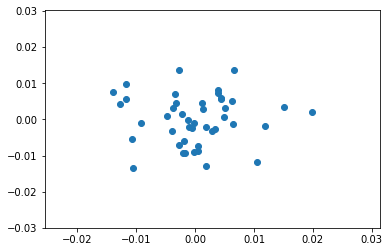

In [45]:

plt.scatter(result[:, 0], result[:, 1])

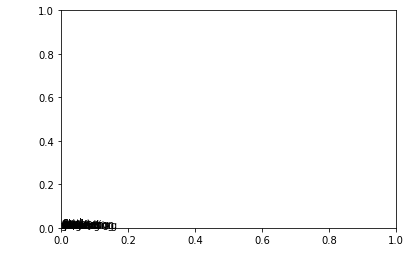

In [46]:

for i, word in enumerate(words):
      plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()
      
      

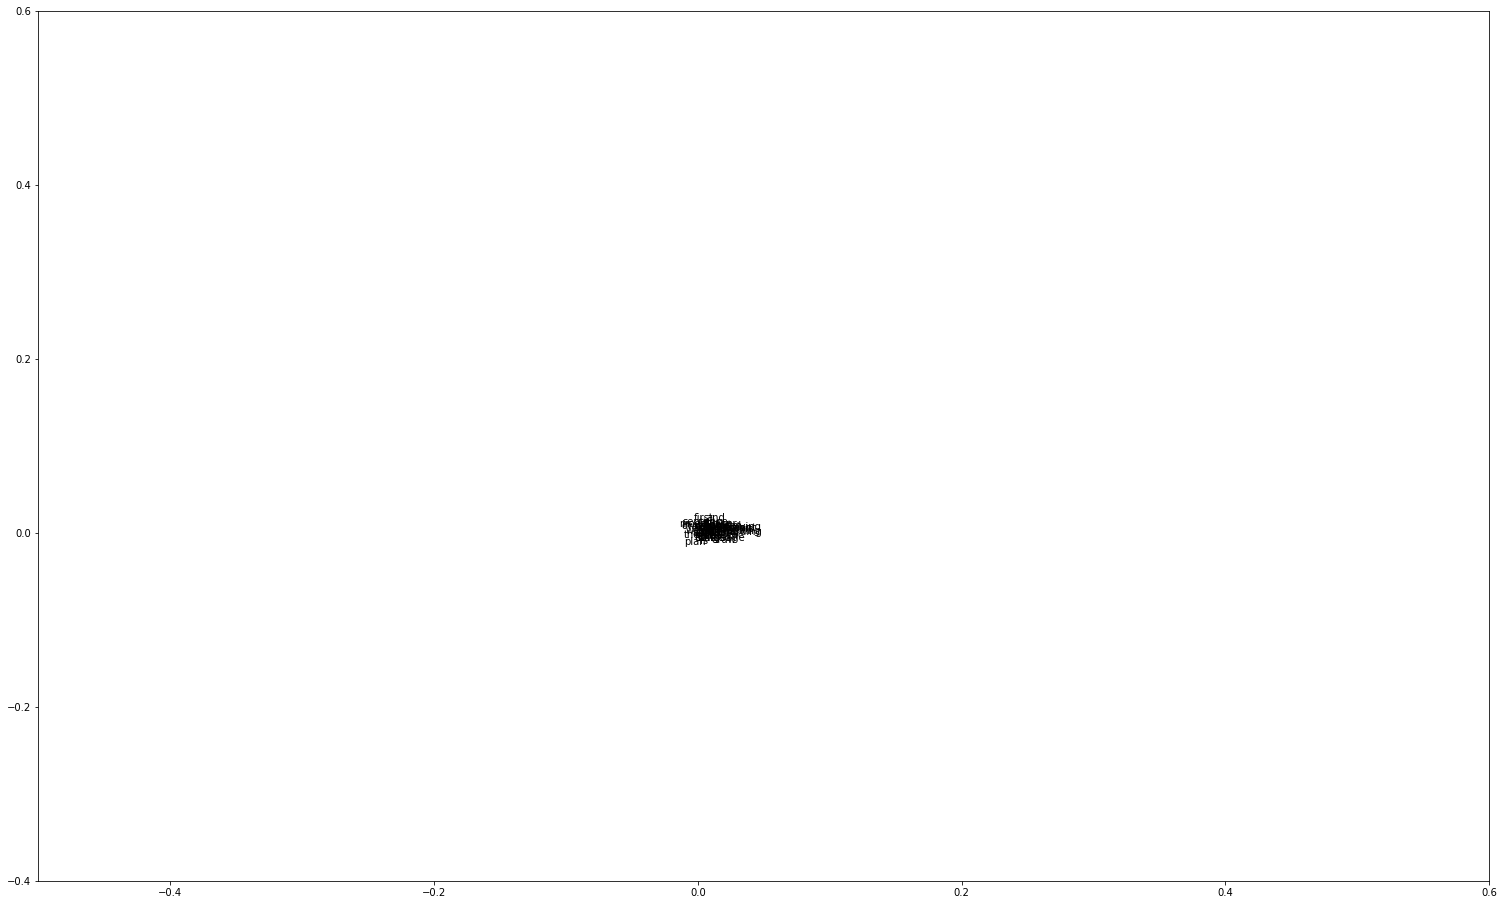

In [78]:
fig, ax = plt.subplots(figsize=(26, 16))
for i, word in enumerate(words):
      plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.axis([-0.5,0.6,-0.4,0.6])
plt.show()



Let us return to the Google News Model where we have much more words and see if we can plot those ones as well.

In [48]:
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [49]:
import numpy as np
labels = []
count = 0
max_count = 50
X = np.zeros(shape=(max_count,len(model['machine'])))



In [50]:
for term in model.vocab:
    X[count] = model[term]
    labels.append(term)
    count+= 1
    if count >= max_count: break

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_50 = pca.fit_transform(X)

In [52]:
# Using TSNE to further reduce to 2 dimensions
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_50)

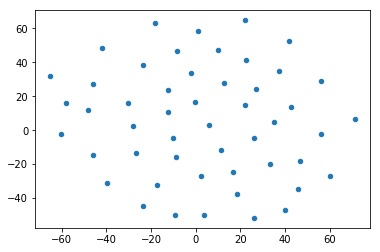

In [53]:
# Show the scatter plot
import matplotlib.pyplot as plt
plt.scatter(Y[:,0], Y[:,1], 20)

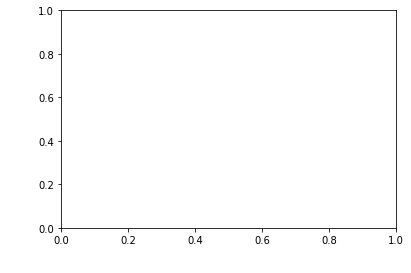

In [54]:
# Add labels
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10) 
plt.show()

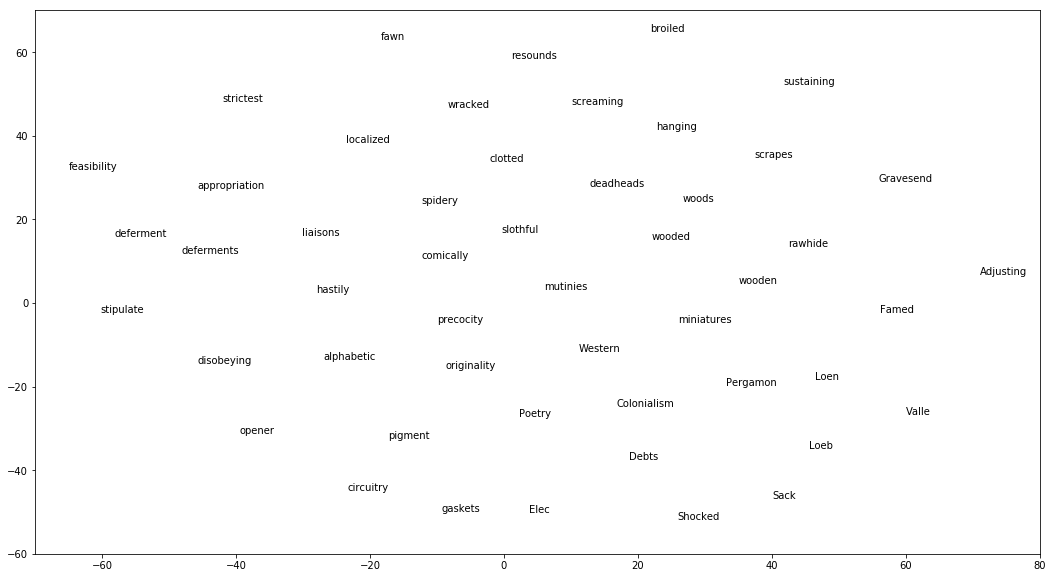

In [55]:
# Fixing the dimensions and the axes
fig, ax = plt.subplots(figsize=(18, 10))
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)

plt.axis([-70,80,-60,70])    
plt.show()

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2 = pca.fit_transform(X)

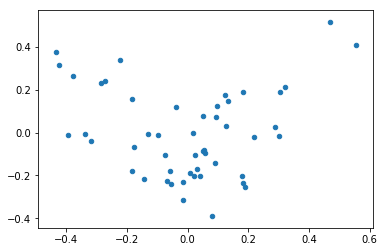

In [57]:
import matplotlib.pyplot as plt
plt.scatter(X_2[:,0], X_2[:,1], 20)

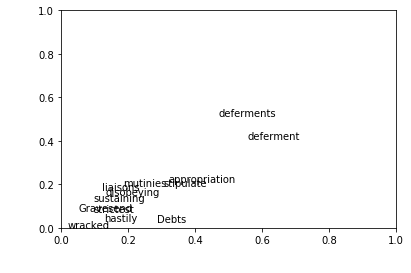

In [58]:
for label, x, y in zip(labels, X_2[:, 0], X_2[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10) 
plt.show()

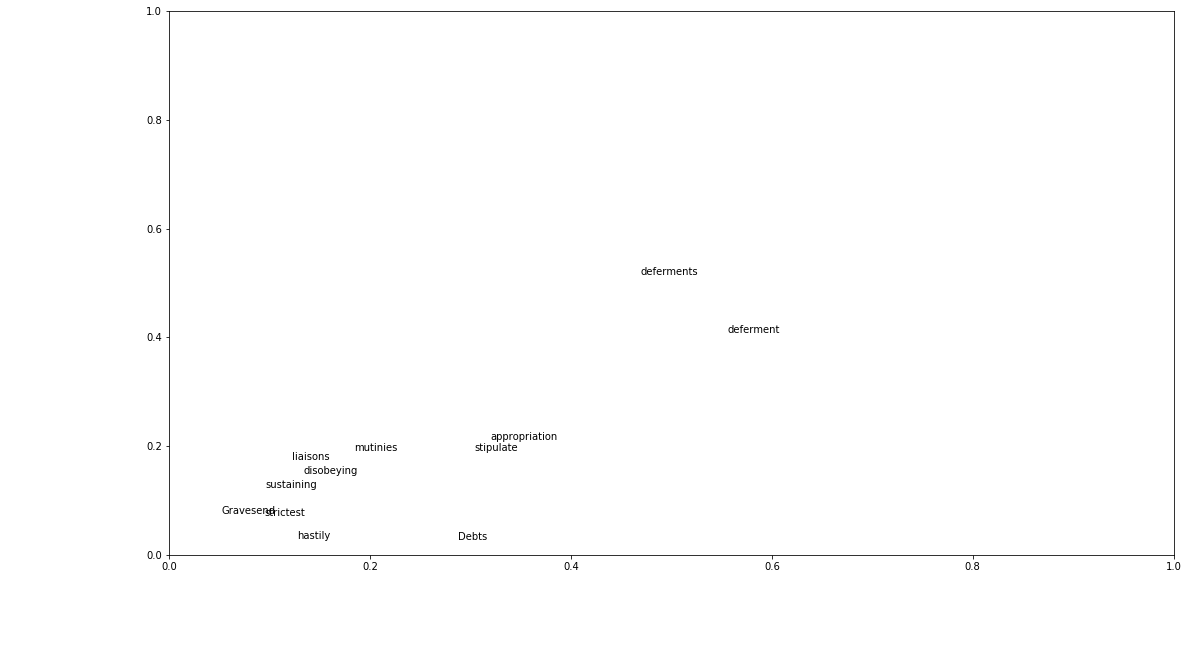

In [59]:
fig, ax = plt.subplots(figsize=(18, 10))
for label, x, y in zip(labels, X_2[:, 0], X_2[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)

plt.axis([0,1.0,0,1.0]) 
plt.show()



PROCESSING AND CLASSIFYING DOCUMENTS with DOC2VEC and GENSIM



The purpose of doc2vec is to create a numeric representation of a document, regardless of it’s length. 

The first deploys an extension of the CBOW model, but instead of using just words to predict the next word, another feature vector has been added, which is document-unique (a Paragraph id based off of a matrix that represents the paragraph).

So, when training the word vectors W, the document vector D is trained as well, and in the end of training, it holds a numeric representation of the document.

The model above is called Distributed Memory version of Paragraph Vector (PV-DM). It acts as a memory that remembers what is missing from the current context and infers the topic of the paragraph.

Similarly to word2vec, another algorithm, which is similar to skip-gram may be used Distributed Bag of Words version of Paragraph Vector (PV-DBOW).

Le and Mikolov recommend using a combination of both algorithms, though the PV-DM model is superior and usually will achieve state of the art results by itself.

For training a doc2vec model, a set of documents is required. a word vector W is generated for each word, and a document vector D is generated for each document. The model also trains weights for a softmax hidden layer. 

For certain document(s), the model will track down most similar documents.

Also, in the inference stage, a new document may be presented, and all weights are fixed to calculate the document vector.

In [60]:
from nltk.corpus import stopwords
import os as os
from os import listdir
from os.path import isfile, join

In [61]:
HOME = os.getcwd()

In [62]:
pwd

u'/Users/christanasescu'

In [63]:

docLabels = []

In [64]:

docLabels = [f for f in listdir(HOME + "/US_Poets_Anthology/")]

In [65]:

#create a list data that stores the content of all text files in order of their names in docLabels

data = []
for doc in docLabels:
  data.append(open(HOME + "/US_Poets_Anthology/" + doc).read())

In [66]:

from nltk.tokenize import *

In [67]:

pattern = r'\w+'

In [68]:

tokenizer = RegexpTokenizer(pattern)


In [69]:

stopword_set = set(nltk.corpus.stopwords.words("english"))

In [70]:
def nlp_clean(data):
   new_data = []
   for d in data:
      new_str = d.lower()
      dlist = tokenizer.tokenize(new_str)
      dlist = list(set(dlist).difference(stopword_set))
      new_data.append(dlist)
   return new_data

In [71]:

class LabeledLineSentence(object):
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
              yield gensim.models.doc2vec.LabeledSentence(doc,    
[self.labels_list[idx]])


In [72]:
data = nlp_clean(data)

In [73]:
#Now we have “docLabels” that stores unique labels for all documents and “data” that stores the corresponding data of that document.

#iterator returned over all documents
it = LabeledLineSentence(data, docLabels)

In [74]:

model = gensim.models.Doc2Vec(size=300, min_count=0, alpha=0.025, min_alpha=0.025)


/anaconda2/lib/python2.7/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [75]:

model.build_vocab(it)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  if __name__ == '__main__':


In [76]:
model.train(it, total_examples=model.corpus_count, epochs=model.epochs)

#model.train(it, total_examples=model.corpus_count, epochs=model.iter)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  if __name__ == '__main__':


In [77]:
#loading the model
d2v_model = gensim.models.doc2vec.Doc2Vec.load("doc2vec.model")

IOError: [Errno 2] No such file or directory: 'doc2vec.model'

In [ ]:

#to get most similar document with similarity scores using document-index
similar_doc = d2v_model.docvecs.most_similar(21) 
print similar_doc
#to get most similar document with similarity scores using document- name
sims = d2v_model.docvecs.most_similar(‘mullen-marry-at-hotel.txt’)
print sims


In [ ]:
sims = d2v_model.docvecs.most_similar('baldwin_internet_unconscious.txt')

In [ ]:
#to get vector of document that are not present in corpus 
docvec = d2v_model.docvecs.infer_vector(‘new_poem.txt’)
print docvec



References
Mikolov, Tomas, et al. 2013. "Distributed Representations of Words and Phrases and their Compositionality" 
Le, Quoc and Mikolov, Tomas. 2014. "Distributed Representations of Sentences and Documents
TensorFlow, "Vector Representations of Words"
Brownlee, Jason. 2017. Machine Learning Mastery